In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('transfusion.data.csv.txt')

In [3]:
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
data.tail()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [6]:
data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [7]:
data.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [8]:
data.shape

(748, 5)

In [9]:
data.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [10]:
data[data.duplicated()].sort_values(by='Recency (months)')

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
18,2,6,1500,15,1
164,2,1,250,2,1
165,2,1,250,2,1
166,2,1,250,2,0
167,2,1,250,2,0
...,...,...,...,...,...
482,23,1,250,23,0
483,23,1,250,23,0
723,23,2,500,28,0
740,23,1,250,23,0


In [11]:
data.drop_duplicates(inplace=True)

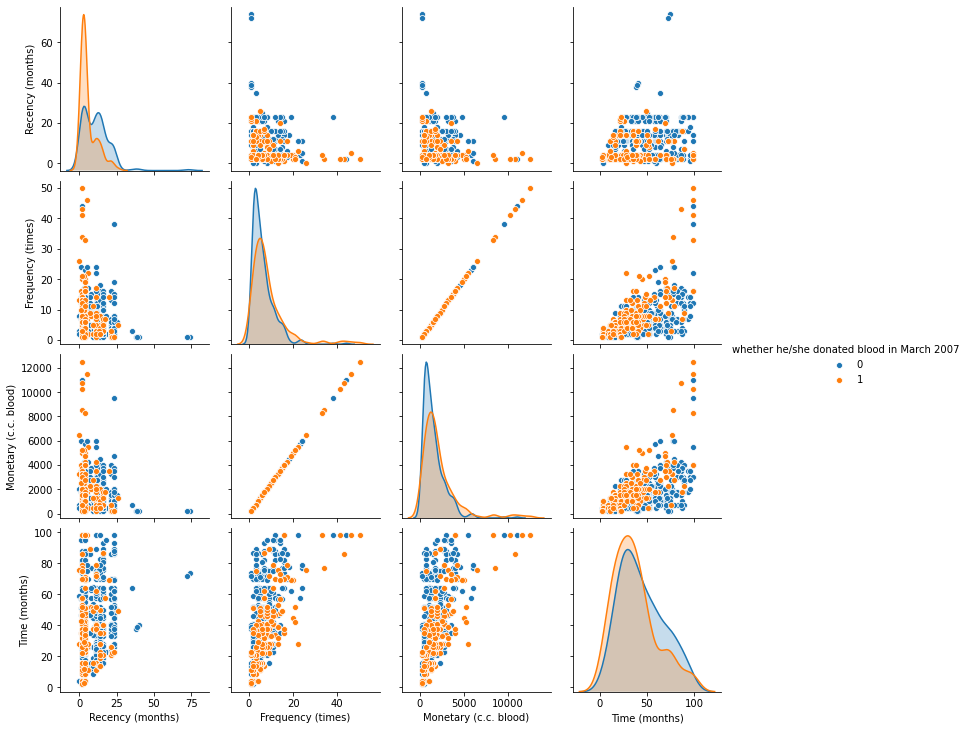

In [12]:
sns.pairplot(data=data,hue='whether he/she donated blood in March 2007')
plt.show()

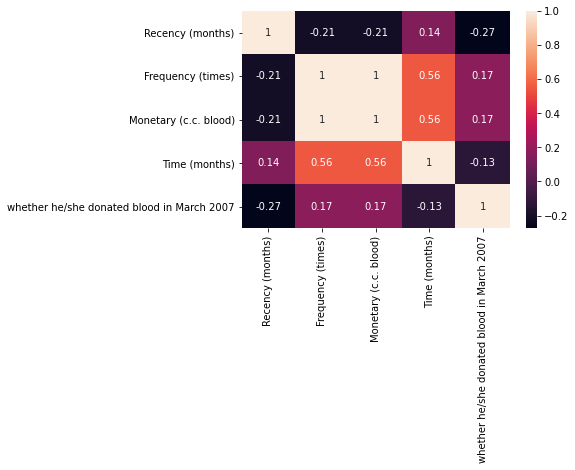

In [13]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [14]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=47)

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=47)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [18]:
ac = accuracy_score(y_test,y_pred)
ac

0.6542056074766355

In [19]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[58, 18],
       [19, 12]], dtype=int64)

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76        76
           1       0.40      0.39      0.39        31

    accuracy                           0.65       107
   macro avg       0.58      0.58      0.58       107
weighted avg       0.65      0.65      0.65       107



## Hyperparameter Tuning

In [21]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 47,
 'splitter': 'best'}

In [22]:
from sklearn.model_selection import GridSearchCV

params_dt = {'max_depth':[2,3,4,5,6],
              'min_samples_leaf': [0.04, 0.06, 0.08],
              'criterion':['gini', 'entropy'],
              'max_features': [0.2, 0.4,0.6, 0.8]}

In [ ]:
gcv = GridSearchCV(dt,param_grid=params_dt,scoring='accuracy',cv=10)
gcv.fit(x_train,y_train)

In [ ]:
gcv.best_params_

In [ ]:
gcv.best_score_